In [15]:
from transformers import AutoModelForImageClassification, AutoImageProcessor
import torch
from PIL import Image

2025-01-20 10:47:15.347681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-20 10:47:15.357466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-20 10:47:15.360490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-20 10:47:15.368326: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [59]:
# init convnextv2 model
conv_model_dir = "/app/spairenow_training/results/convnext_v2"

# Load model and processor
conv_model = AutoModelForImageClassification.from_pretrained(conv_model_dir)
conv_feature_extractor = AutoImageProcessor.from_pretrained(conv_model_dir)

conv_model.to("cuda")

ConvNextV2ForImageClassification(
  (convnextv2): ConvNextV2Model(
    (embeddings): ConvNextV2Embeddings(
      (patch_embeddings): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (layernorm): ConvNextV2LayerNorm()
    )
    (encoder): ConvNextV2Encoder(
      (stages): ModuleList(
        (0): ConvNextV2Stage(
          (downsampling_layer): Identity()
          (layers): Sequential(
            (0): ConvNextV2Layer(
              (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
              (layernorm): ConvNextV2LayerNorm()
              (pwconv1): Linear(in_features=128, out_features=512, bias=True)
              (act): GELUActivation()
              (grn): ConvNextV2GRN()
              (pwconv2): Linear(in_features=512, out_features=128, bias=True)
              (drop_path): Identity()
            )
            (1): ConvNextV2Layer(
              (dwconv): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=

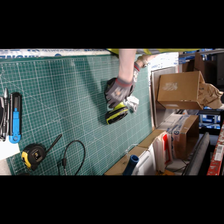

Image 1 Top-5 Predictions: ['Kupplungskopf gelb ohne Filter ohne PA', 'URL MD24 links rechts AMP', 'Wegsensor Einsatz TEBS-E', 'Querhalter Leiter vorne', 'Federriegel arret']


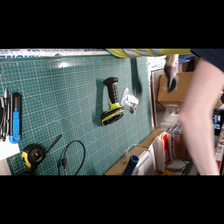

Image 2 Top-5 Predictions: ['Wegsensor Einsatz TEBS-E', 'URL MD24 links rechts AMP', 'Spannseil Hestal VarioMaster max Hub 510', 'Befestigungsseil Erstspriegel Magnum', 'Kupplungskopf gelb ohne Filter ohne PA']


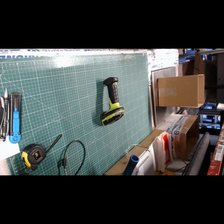

Image 3 Top-5 Predictions: ['Wegsensor Einsatz TEBS-E', 'URL MD24 links rechts AMP', 'Spannseil Hestal VarioMaster max Hub 510', 'Kupplungskopf gelb ohne Filter ohne PA', 'Befestigungsseil Erstspriegel Magnum']


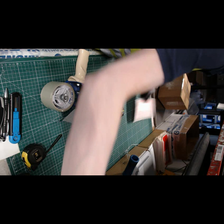

Image 4 Top-5 Predictions: ['Radbolzen M22x1,5x80 DAC 10,9 Wendelbolzen', 'Wegsensor Einsatz TEBS-E', 'Laufwagen Penta Wave', 'Laufrolle Frigowall', 'Laufrolle mit Achse 1']


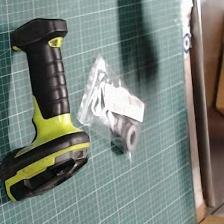

Image 5 Top-5 Predictions: ['Kupplungskopf gelb ohne Filter ohne PA', 'Wegsensor Einsatz TEBS-E', 'URL MD24 links rechts AMP', 'Spannseil Hestal VarioMaster max Hub 510', 'Laufrolle Frigowall']


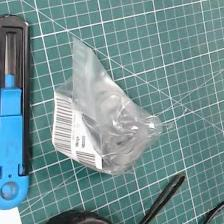

Image 6 Top-5 Predictions: ['URL MD24 links rechts AMP', 'Stütze rechts für Einhakprofil', 'Wegsensor Einsatz TEBS-E', 'Deckelstrebe 36 EP 316mm', 'Laufrolle mit Achse 1']


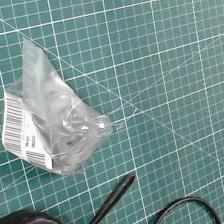

Image 7 Top-5 Predictions: ['URL MD24 links rechts AMP', 'Spannseil Hestal VarioMaster max Hub 510', 'Laufrolle mit Achse 1', 'Stützrolle NA 2206 2RS', 'Befestigungsseil Erstspriegel Magnum']


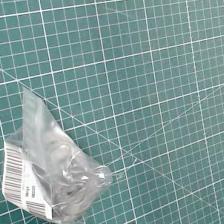

Image 8 Top-5 Predictions: ['URL MD24 links rechts AMP', 'Stützrolle NA 2206 2RS', 'Spanngurt horizontal Teil 3 Stahlverschluss', 'Befestigungsseil Erstspriegel Magnum', 'Adapter für Spannstange Thiriet']


In [60]:
image_paths = [
    "/app/packtisch/square_frames_224/2024-09-23_14-17-19_cam2/1300.png",
    "/app/packtisch/square_frames_224/2024-09-23_14-17-19_cam2/1400.png",
    "/app/packtisch/square_frames_224/2024-09-23_14-17-19_cam2/1500.png",
    "/app/packtisch/square_frames_224/2024-09-23_14-17-19_cam2/2300.png",
    "/app/packtisch/cutouts_224/2024-09-23_14-17-19_cam2/1400.jpg",
    "/app/packtisch/cutouts_224/2024-09-23_14-17-19_cam2/1120_v1.jpg",
    "/app/packtisch/cutouts_224/2024-09-23_14-17-19_cam2/1120_v2.jpg",
    "/app/packtisch/cutouts_224/2024-09-23_14-17-19_cam2/1120_v3.jpg",
]

# Load and preprocess the image
images = [Image.open(img).convert("RGB") for img in image_paths]
inputs = conv_feature_extractor(images=images, return_tensors="pt").to("cuda")

# Perform prediction
with torch.no_grad():
    logits = conv_model(**inputs).logits


# top 5
top5 = [torch.topk(l, k=5) for l in logits]
predicted_top5_indices = [t.indices.tolist() for t in top5]
predicted_top5_names = [
    [conv_model.config.id2label[idx] for idx in indices]
    for indices in predicted_top5_indices
]
for i, names in enumerate(predicted_top5_names):
    images[i].show()
    print(f"Image {i+1} Top-5 Predictions: {names}")

# top 1
# predicted_label = [l.argmax(-1).item() for l in logits]
# predicted_names = [conv_model.config.id2label[prediction] for prediction in predicted_label]
# print(predicted_names)

In [61]:
# init swin model
swin_model_dir = "/app/spairenow_training/results/swin_v2_192"

# Load model and processor
swin_model = AutoModelForImageClassification.from_pretrained(swin_model_dir)
swin_feature_extractor = AutoImageProcessor.from_pretrained(swin_model_dir)

swin_model.to("cuda")

Swinv2ForImageClassification(
  (swinv2): Swinv2Model(
    (embeddings): Swinv2Embeddings(
      (patch_embeddings): Swinv2PatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Swinv2Encoder(
      (layers): ModuleList(
        (0): Swinv2Stage(
          (blocks): ModuleList(
            (0): Swinv2Layer(
              (attention): Swinv2Attention(
                (self): Swinv2SelfAttention(
                  (continuous_position_bias_mlp): Sequential(
                    (0): Linear(in_features=2, out_features=512, bias=True)
                    (1): ReLU(inplace=True)
                    (2): Linear(in_features=512, out_features=4, bias=False)
                  )
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128

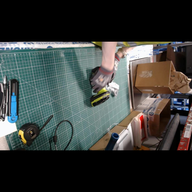

Image 1 Top-5 Predictions: ['Laufwagen Penta Wave', 'Spannseil Hestal VarioMaster max Hub 510', 'Festpunktlasche AGS', 'Verriegelungshaken L5', 'Kupplungskopf gelb ohne Filter ohne PA']


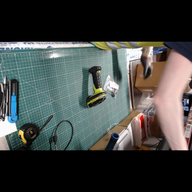

Image 2 Top-5 Predictions: ['Festpunktlasche AGS', 'Halterung Einhakprofil rechts', 'Wegsensor Einsatz TEBS-E', 'Spannseil Hestal VarioMaster max Hub 510', 'Verriegelungshaken L5']


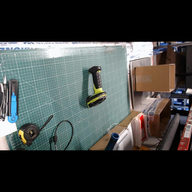

Image 3 Top-5 Predictions: ['Festpunktlasche AGS', 'Halterung Einhakprofil rechts', 'Wegsensor Einsatz TEBS-E', 'URL MD24 links rechts AMP', 'Verriegelungshaken L5']


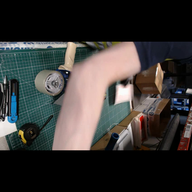

Image 4 Top-5 Predictions: ['Laufwagen Penta Wave', 'Federriegel arret', 'Laufrolle mit Achse 1', 'Festpunktlasche AGS', 'Befestigungsseil Erstspriegel Magnum']


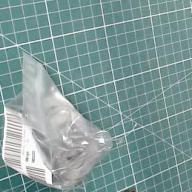

Image 5 Top-5 Predictions: ['Radbolzen M22x1,5x80 DAC 10,9 Wendelbolzen', 'Sechskantschraube M16x150 ZnNi', 'Kupplungskopf gelb ohne Filter ohne PA', 'Verstärkung für Ausleger 1', 'Spannzapfen']


: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
image_paths = [
    "/app/packtisch/square_frames_192/2024-09-23_14-17-19_cam2/1300.png",
    "/app/packtisch/square_frames_192/2024-09-23_14-17-19_cam2/1400.png",
    "/app/packtisch/square_frames_192/2024-09-23_14-17-19_cam2/1500.png",
    "/app/packtisch/square_frames_192/2024-09-23_14-17-19_cam2/2300.png",
    "/app/packtisch/cutouts_192/2024-09-23_14-17-19_cam2/1120_v1.jpg",
]

# Load and preprocess the image
images = [Image.open(img).convert("RGB") for img in image_paths]
inputs = swin_feature_extractor(images=images, return_tensors="pt").to("cuda")

# Perform prediction
with torch.no_grad():
    logits = swin_model(**inputs).logits


# top 5
top5 = [torch.topk(l, k=5) for l in logits]
predicted_top5_indices = [t.indices.tolist() for t in top5]
predicted_top5_names = [
    [swin_model.config.id2label[idx] for idx in indices]
    for indices in predicted_top5_indices
]
for i, names in enumerate(predicted_top5_names):
    images[i].show()
    print(f"Image {i+1} Top-5 Predictions: {names}")

# top 1
# predicted_label = [l.argmax(-1).item() for l in logits]
# predicted_names = [swin_model.config.id2label[prediction] for prediction in predicted_label]
# print(predicted_names)